In [1]:
import rasterio
from matplotlib import pyplot as plt
from rasterio.plot import show
import geopandas as gpd

import sys
sys.path.insert(0, "..")

from eis_toolkit.prediction.weights_of_evidence import weights_of_evidence

In [2]:
with rasterio.open("../tests/data/remote/wofe/wofe_evidence_raster.tif") as evidence_raster:
    deposits = gpd.read_file("../tests/data/remote/wofe/wofe_deposits.shp")

    weights_unique, rasters_unique, _ = weights_of_evidence(evidence_raster, deposits, weights_type='unique')
    weights_ascending, rasters_ascending, _ = weights_of_evidence(evidence_raster, deposits, weights_type='ascending', studentized_contrast_threshold=1)
    weights_descending, rasters_descending, _ = weights_of_evidence(evidence_raster, deposits, weights_type='descending', studentized_contrast_threshold=1)

In [3]:
# Unique weights DF
weights_unique

,Class,Pixel count,Deposit count,W+,S_W+,W-,S_W-,Contrast,S_Contrast,Studentized contrast
0,1.0,275,9,0.4810,0.3389,-0.3994,0.3806,0.8804,0.5096,1.7275
1,2.0,11,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,3.0,396,5,-0.4920,0.4501,0.3409,0.3059,-0.8329,0.5442,-1.5306
3,5.0,43,1,0.1296,1.0118,-0.0081,0.2609,0.1377,1.0449,0.1318
4,6.0,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,8.0,43,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,10.0,2,1,3.8673,1.4142,-0.0632,0.2607,3.9305,1.4380,2.7332
7,13.0,10,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [4]:
# Ascending weights DF
weights_ascending

,Class,Pixel count,Deposit count,W+,S_W+,W-,S_W-,Contrast,S_Contrast,Studentized contrast,Generalized class,Generalized W+,Generalized S_W+
0,1.0,275,9,0.4810,0.3389,-0.3994,0.3806,0.8804,0.5096,1.7275,2,0.4810,0.3389
1,2.0,286,9,0.4405,0.3387,-0.3771,0.3807,0.8176,0.5095,1.6046,1,-0.3994,0.3806
2,3.0,682,14,0.0021,0.2700,-0.0143,0.7144,0.0163,0.7637,0.0214,1,-0.3994,0.3806
3,5.0,725,15,0.0101,0.2609,-0.1400,1.0090,0.1501,1.0422,0.1440,1,-0.3994,0.3806
4,6.0,726,15,0.0087,0.2609,-0.1217,1.0092,0.1304,1.0424,0.1251,1,-0.3994,0.3806
5,8.0,769,15,-0.0501,0.2608,1.4694,1.0445,-1.5194,1.0765,-1.4114,1,-0.3994,0.3806
6,10.0,771,16,-0.0507,0.2607,1.5547,1.0536,-1.6054,1.0854,-1.4791,1,-0.3994,0.3806
7,13.0,781,16,-0.0626,0.2606,3.8673,1.4213,-3.9299,1.4450,-2.7196,1,-0.3994,0.3806


In [5]:
# Descending weights DF
weights_descending

,Class,Pixel count,Deposit count,W+,S_W+,W-,S_W-,Contrast,S_Contrast,Studentized contrast,Generalized class,Generalized W+,Generalized S_W+
0,13.0,10,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2,1.4694,1.0445
1,10.0,12,1,1.4694,1.0445,-0.0501,0.2608,1.5194,1.0765,1.4114,2,1.4694,1.0445
2,8.0,55,1,-0.1217,1.0092,0.0087,0.2609,-0.1304,1.0424,-0.1251,1,-0.0501,0.2608
3,6.0,56,1,-0.1400,1.0090,0.0101,0.2609,-0.1501,1.0422,-0.1440,1,-0.0501,0.2608
4,5.0,99,2,-0.0143,0.7144,0.0021,0.2700,-0.0163,0.7637,-0.0214,1,-0.0501,0.2608
5,3.0,495,7,-0.3771,0.3807,0.4405,0.3387,-0.8176,0.5095,-1.6046,1,-0.0501,0.2608
6,2.0,506,7,-0.3994,0.3806,0.4810,0.3389,-0.8804,0.5096,-1.7275,1,-0.0501,0.2608
7,1.0,781,16,-0.0626,0.2606,3.8673,1.4213,-3.9299,1.4450,-2.7196,1,-0.0501,0.2608


<Axes: title={'center': 'Unique weights - S_W+'}>

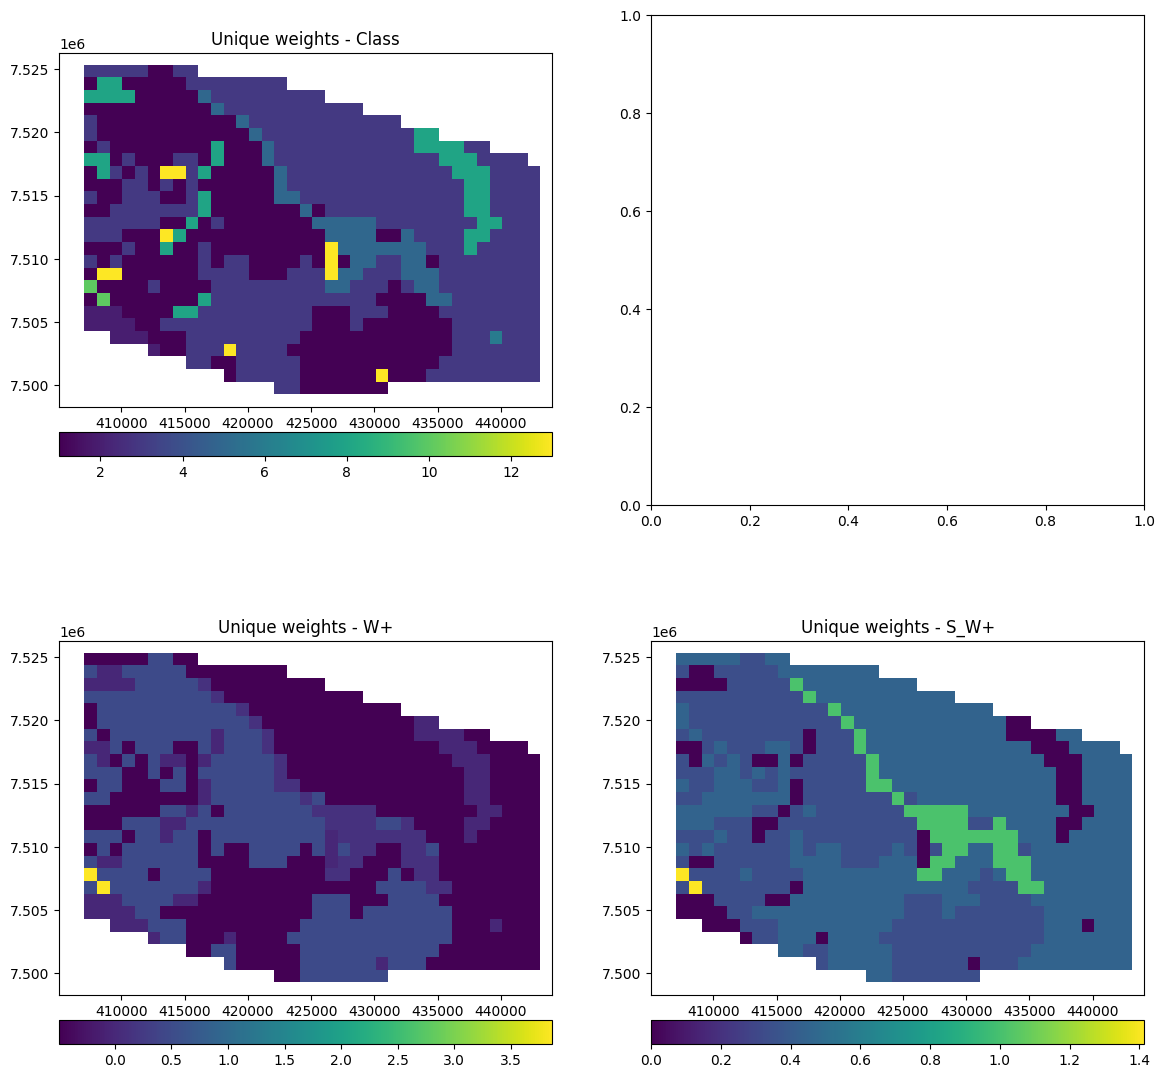

In [6]:
# Plot unique weights

fig, axs = plt.subplots(2, 2, figsize = (14, 14))

axs[0, 0].set_title("Unique weights - Class")
clrbar = axs[0, 0].imshow(rasters_unique["Class"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_unique["Class"], ax = axs[0, 0], transform = evidence_raster.transform, cmap='viridis')

axs[1, 0].set_title("Unique weights - W+")
clrbar = axs[1, 0].imshow(rasters_unique["W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_unique["W+"], ax = axs[1, 0], transform = evidence_raster.transform, cmap='viridis')

axs[1, 1].set_title("Unique weights - S_W+")
clrbar = axs[1, 1].imshow(rasters_unique["S_W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_unique["S_W+"], ax = axs[1, 1], transform = evidence_raster.transform, cmap='viridis')

<Axes: title={'center': 'Ascending weights - Generalized S_W+'}>

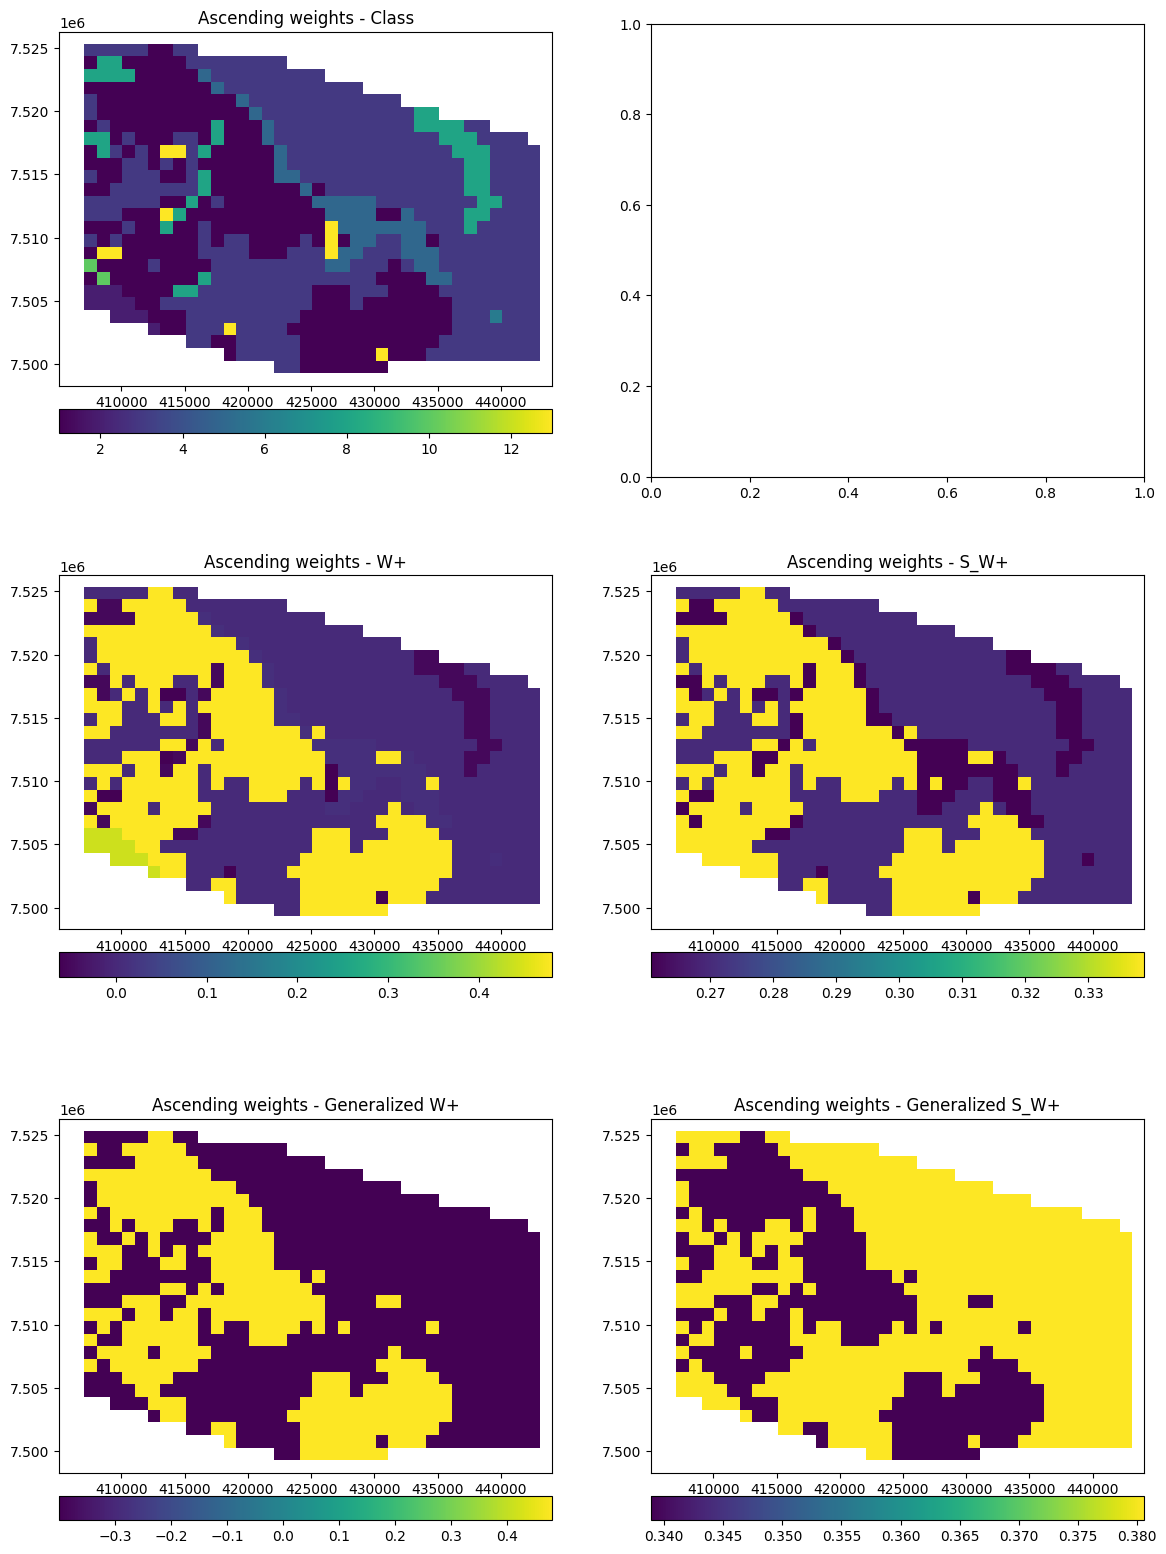

In [7]:
# Plot ascending weights

fig, axs = plt.subplots(3, 2, figsize = (14, 20))

axs[0, 0].set_title("Ascending weights - Class")
clrbar = axs[0, 0].imshow(rasters_ascending["Class"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_ascending["Class"], ax = axs[0, 0], transform = evidence_raster.transform, cmap='viridis')

axs[1, 0].set_title("Ascending weights - W+")
clrbar = axs[1, 0].imshow(rasters_ascending["W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_ascending["W+"], ax = axs[1, 0], transform = evidence_raster.transform, cmap='viridis')

axs[1, 1].set_title("Ascending weights - S_W+")
clrbar = axs[1, 1].imshow(rasters_ascending["S_W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_ascending["S_W+"], ax = axs[1, 1], transform = evidence_raster.transform, cmap='viridis')

axs[2, 0].set_title("Ascending weights - Generalized W+")
clrbar = axs[2, 0].imshow(rasters_ascending["Generalized W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_ascending["Generalized W+"], ax = axs[2, 0], transform = evidence_raster.transform, cmap='viridis')

axs[2, 1].set_title("Ascending weights - Generalized S_W+")
clrbar = axs[2, 1].imshow(rasters_ascending["Generalized S_W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_ascending["Generalized S_W+"], ax = axs[2, 1], transform = evidence_raster.transform, cmap='viridis')


<Axes: title={'center': 'Descending weights - Generalized S_W+'}>

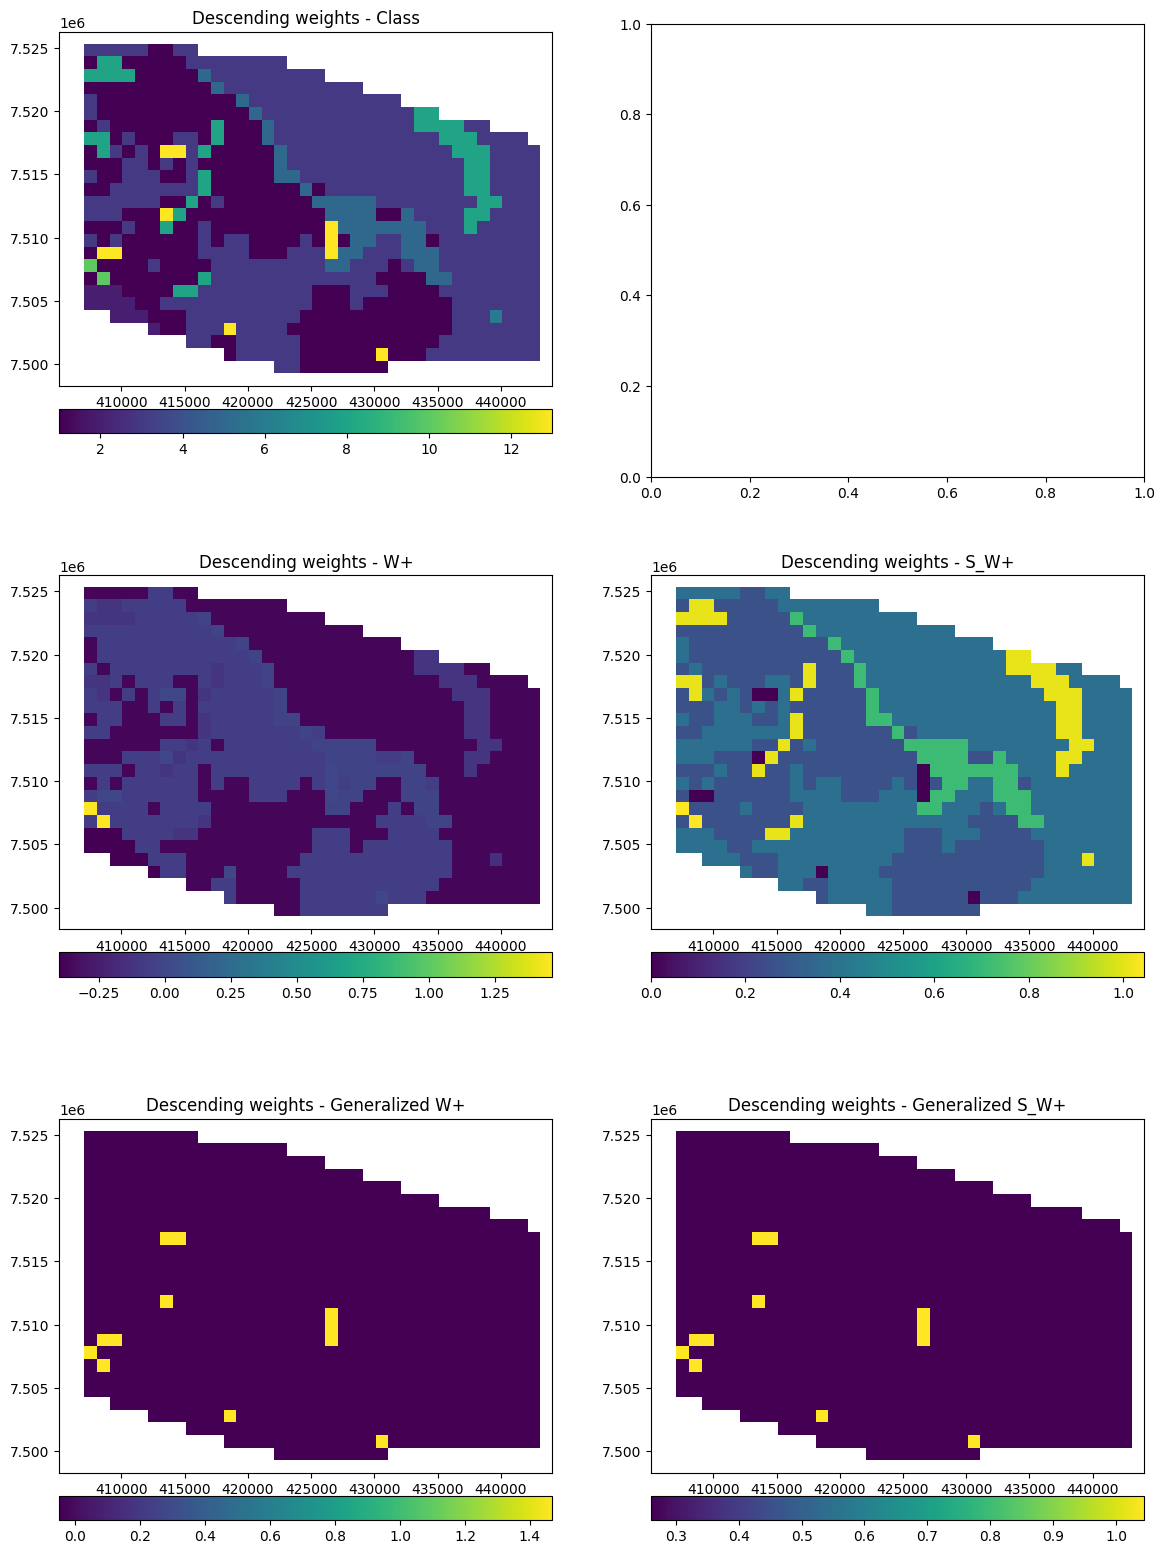

In [8]:
# Plot descending weights

fig, axs = plt.subplots(3, 2, figsize = (14, 20))

axs[0, 0].set_title("Descending weights - Class")
clrbar = axs[0, 0].imshow(rasters_descending["Class"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_descending["Class"], ax = axs[0, 0], transform = evidence_raster.transform, cmap='viridis')

axs[1, 0].set_title("Descending weights - W+")
clrbar = axs[1, 0].imshow(rasters_descending["W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_descending["W+"], ax = axs[1, 0], transform = evidence_raster.transform, cmap='viridis')

axs[1, 1].set_title("Descending weights - S_W+")
clrbar = axs[1, 1].imshow(rasters_descending["S_W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_descending["S_W+"], ax = axs[1, 1], transform = evidence_raster.transform, cmap='viridis')

axs[2, 0].set_title("Descending weights - Generalized W+")
clrbar = axs[2, 0].imshow(rasters_descending["Generalized W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_descending["Generalized W+"], ax = axs[2, 0], transform = evidence_raster.transform, cmap='viridis')

axs[2, 1].set_title("Descending weights - Generalized S_W+")
clrbar = axs[2, 1].imshow(rasters_descending["Generalized S_W+"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(rasters_descending["Generalized S_W+"], ax = axs[2, 1], transform = evidence_raster.transform, cmap='viridis')